In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import re


콘텐츠 타입별 출시 통계:

MAIN 통계:
출시 횟수: 1
평균 순위: 44.00
최고 순위: 44
최저 순위: 44
평균 순위 변동폭: 0.00

EP 통계:
출시 횟수: 18
평균 순위: 36.89
최고 순위: 11
최저 순위: 64
평균 순위 변동폭: 4.33

GP 통계:
출시 횟수: 11
평균 순위: 42.41
최고 순위: 16
최저 순위: 76
평균 순위 변동폭: 5.27

SP 통계:
출시 횟수: 18
평균 순위: 47.01
최고 순위: 44
최저 순위: 68
평균 순위 변동폭: 2.06

KIT 통계:
출시 횟수: 32
평균 순위: 48.41
최고 순위: 11
최저 순위: 81
평균 순위 변동폭: 13.50


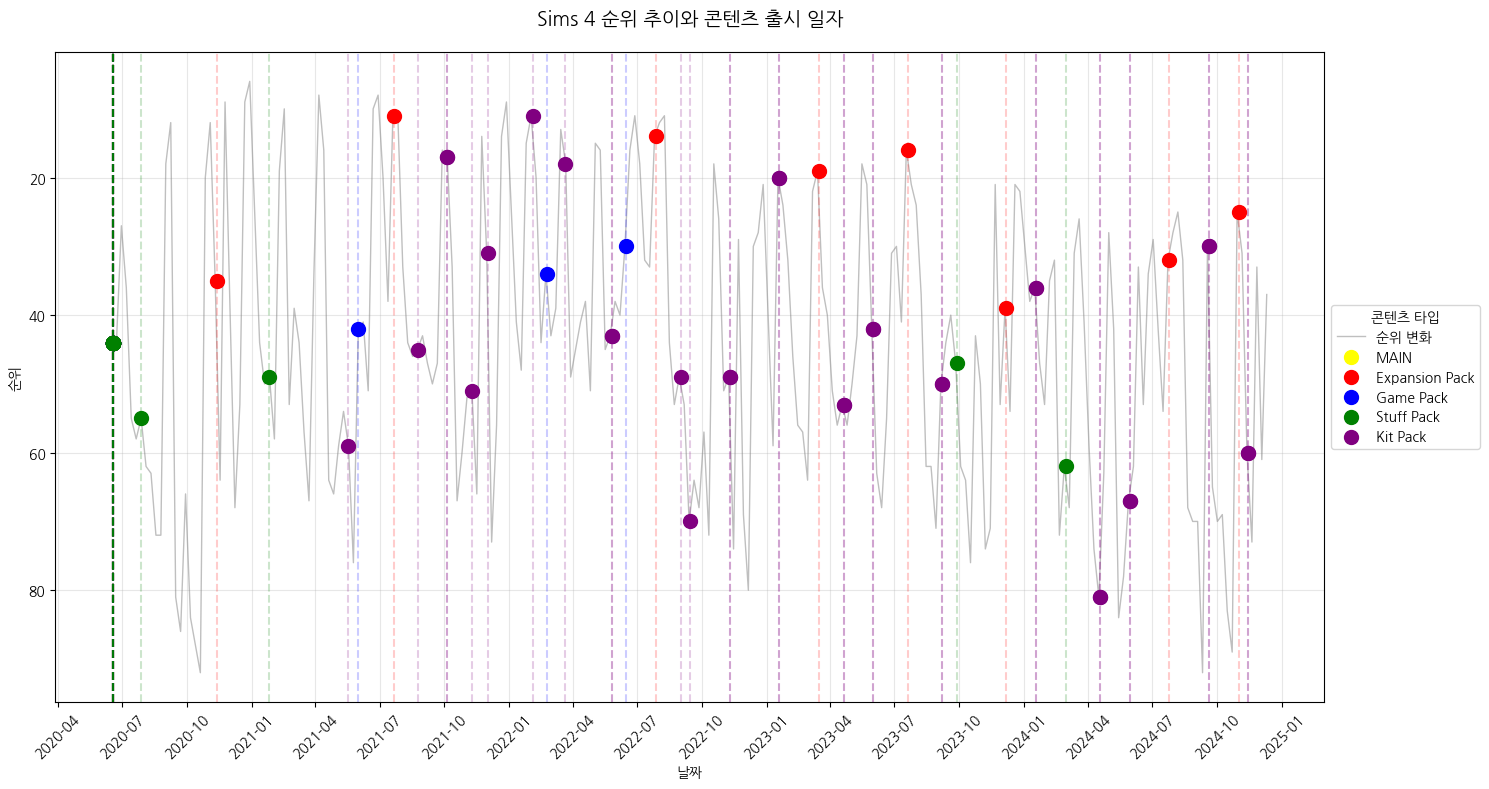

In [2]:
import matplotlib.dates as mdates


# 1. 순위 데이터 전처리
rank_df = pd.read_csv('data/sim4 rank.csv')
rank_df['일자'] = pd.to_datetime(rank_df['일자'])

# 2. 출시 데이터 전처리
release_df = pd.read_csv('data/sims4_release_date.csv.csv')
release_df['release_date'] = pd.to_datetime(release_df['release date'])

# 3. 시각화
plt.figure(figsize=(15, 8))

# 메인 순위 그래프
plt.plot(rank_df['일자'], rank_df['순위'],
         color='gray', alpha=0.5, linewidth=1, 
         label='순위 변화')

# 출시 타입별 색상 지정
color_map = {
    'MAIN': ('yellow','MAIN'),
    'EP': ('red', 'Expansion Pack'),
    'GP': ('blue', 'Game Pack'),
    'SP': ('green', 'Stuff Pack'),
    'KIT': ('purple', 'Kit Pack')
}

# 각 출시일에 대해 수직선과 점 추가
for release_type, (color, label) in color_map.items():
    # 해당 타입의 출시 데이터 필터링
    type_releases = release_df[release_df['type'] == release_type]
    
    if not type_releases.empty:
        for release_date in type_releases['release_date']:
            # 해당 출시일과 가장 가까운 순위 데이터 찾기
            closest_date_idx = np.abs(rank_df['일자'] - release_date).argmin()
            closest_rank = rank_df.iloc[closest_date_idx]['순위']
            
            # 수직선 그리기 (점선)
            plt.axvline(x=release_date, color=color, alpha=0.2, linestyle='--')
            
            # 출시 시점 점 찍기
            plt.scatter(release_date, closest_rank, 
                       c=color, s=100, zorder=5,
                       label=label if release_date == type_releases['release_date'].iloc[0] else "")

# 그래프 꾸미기
plt.title('Sims 4 순위 추이와 콘텐츠 출시 일자', fontsize=14, pad=20)
plt.xlabel('날짜')
plt.ylabel('순위')
plt.grid(True, alpha=0.3)

# 범례 설정 (중복 제거)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), 
          title='콘텐츠 타입', loc='center left', 
          bbox_to_anchor=(1, 0.5))

# x축 날짜 포맷 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# y축 뒤집기 (1위가 위로 가도록)
plt.gca().invert_yaxis()

# 여백 조정
plt.tight_layout()

# 4. 통계 분석
print("\n콘텐츠 타입별 출시 통계:")
for release_type in color_map:
    type_releases = release_df[release_df['type'] == release_type]
    stats = []
    
    for _, release in type_releases.iterrows():
        # 출시일 전후 7일 기간의 순위 변화 계산
        release_date = release['release_date']
        before_date = release_date - pd.Timedelta(days=7)
        after_date = release_date + pd.Timedelta(days=7)
        
        period_ranks = rank_df[
            (rank_df['일자'] >= before_date) & 
            (rank_df['일자'] <= after_date)
        ]['순위']
        
        if not period_ranks.empty:
            stats.append({
                'title': release['title'],
                'release_date': release_date,
                'avg_rank': period_ranks.mean(),
                'min_rank': period_ranks.min(),
                'max_rank': period_ranks.max(),
                'rank_range': period_ranks.max() - period_ranks.min()
            })
    
    if stats:
        stats_df = pd.DataFrame(stats)
        print(f"\n{release_type} 통계:")
        print(f"출시 횟수: {len(stats)}")
        print(f"평균 순위: {stats_df['avg_rank'].mean():.2f}")
        print(f"최고 순위: {stats_df['min_rank'].min():.0f}")
        print(f"최저 순위: {stats_df['max_rank'].max():.0f}")
        print(f"평균 순위 변동폭: {stats_df['rank_range'].mean():.2f}")

plt.show()

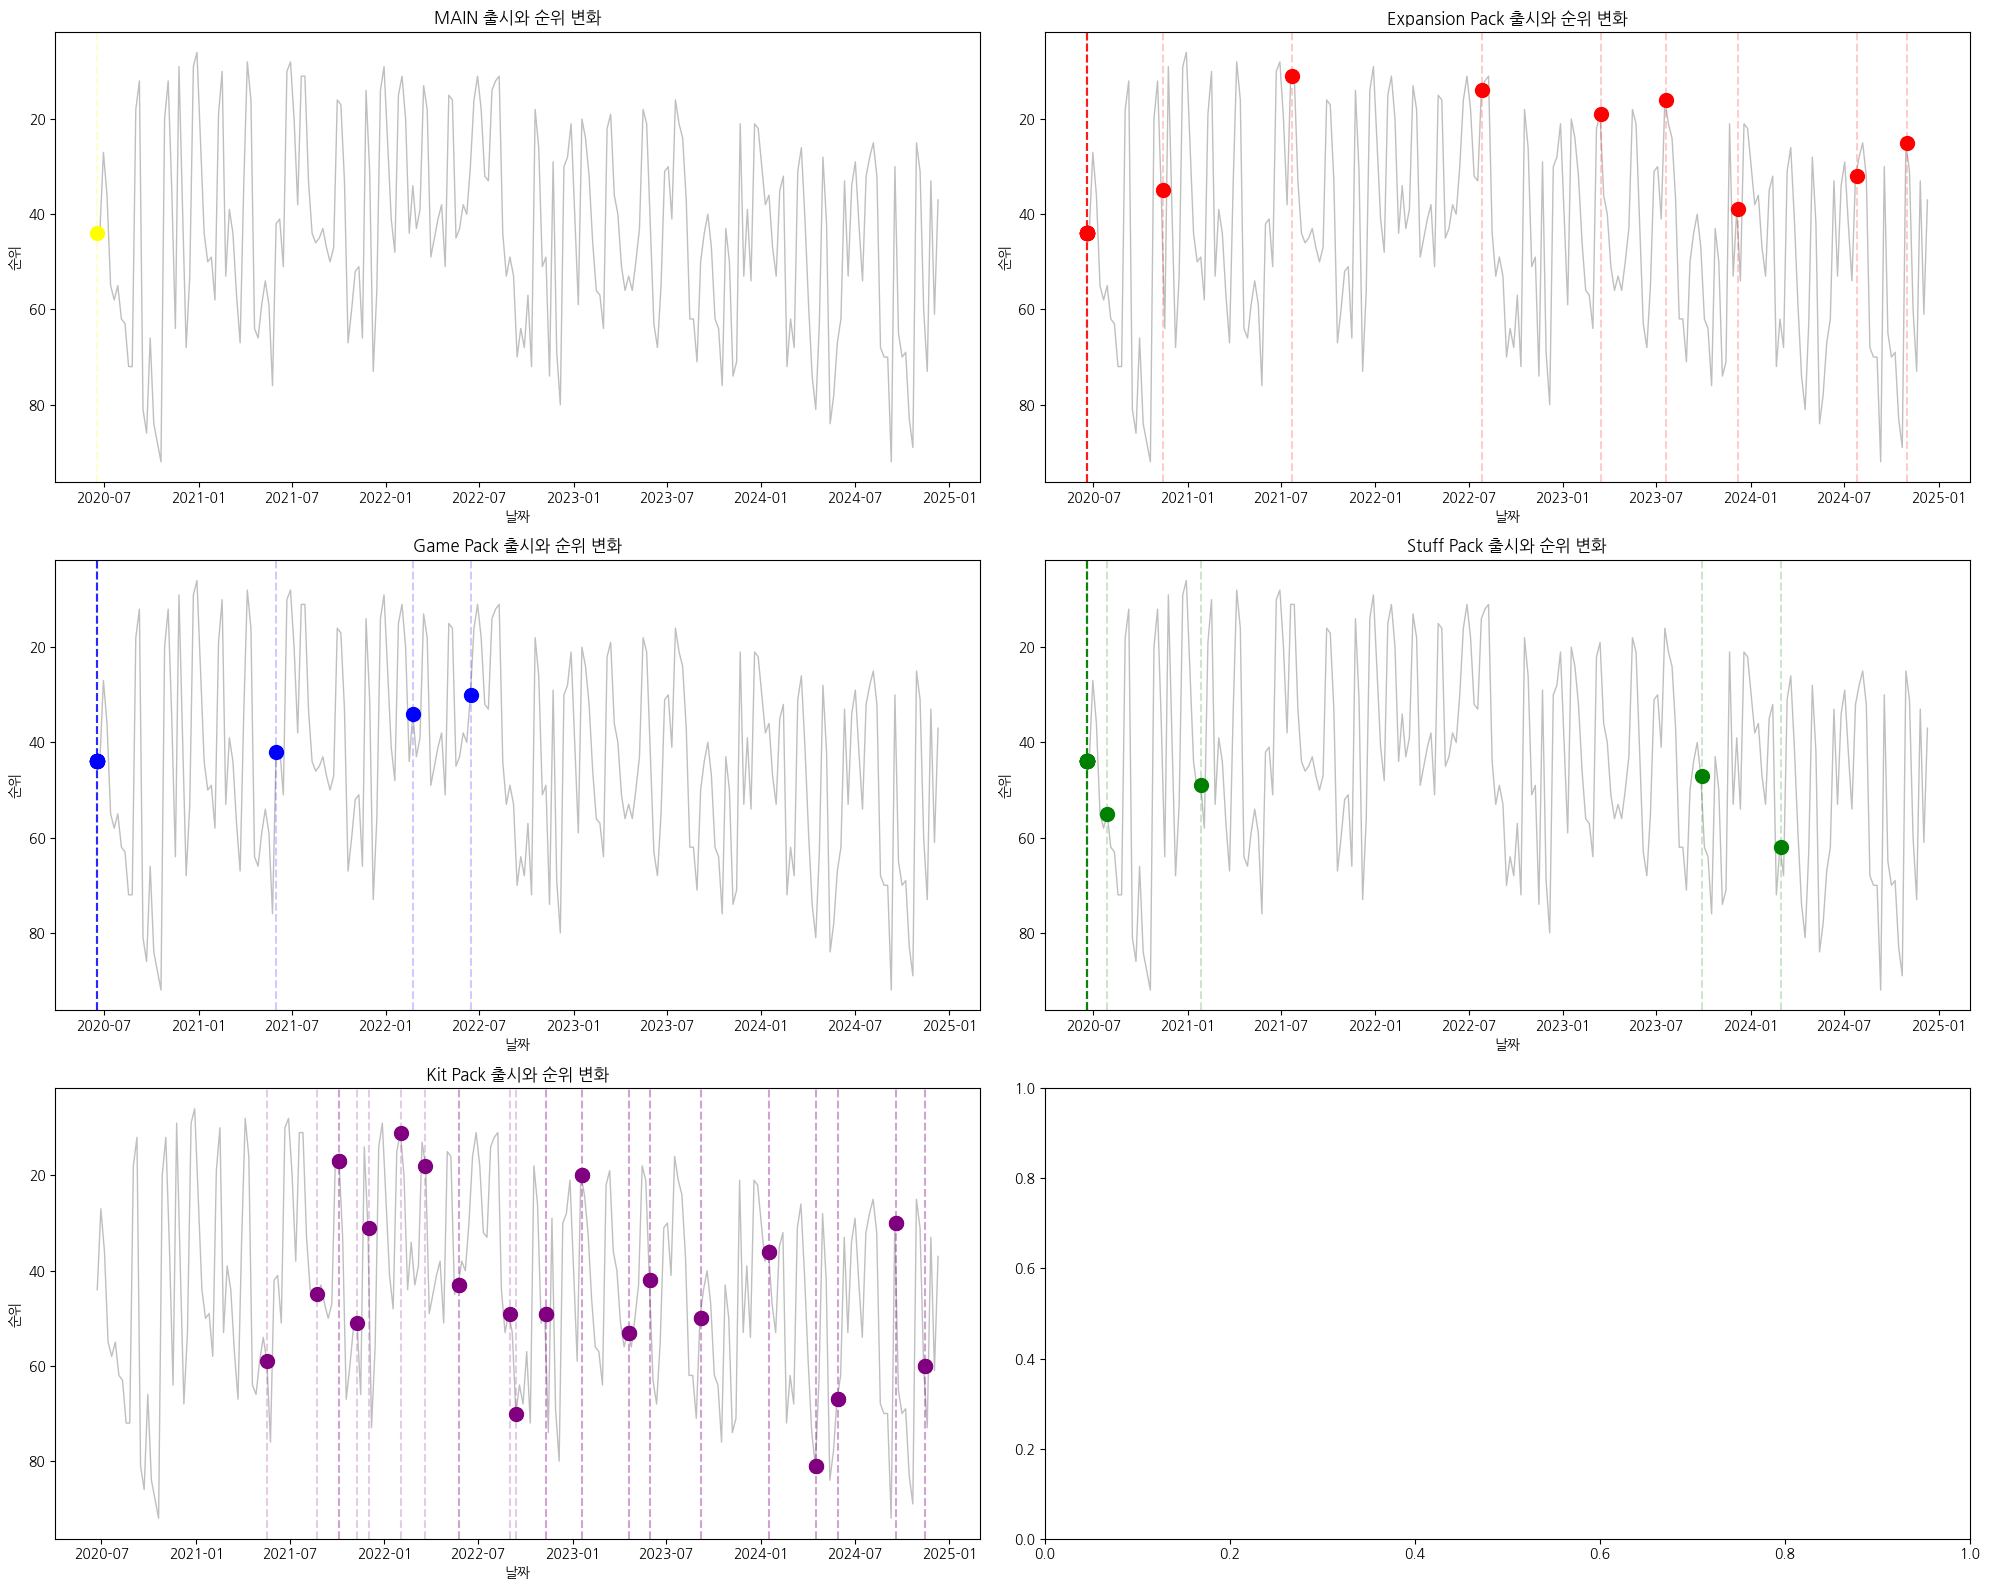

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(20, 16))
axs = axs.ravel()

for idx, (release_type, (color, label)) in enumerate(color_map.items()):
    type_releases = release_df[release_df['type'] == release_type]
    
    axs[idx].plot(rank_df['일자'], rank_df['순위'], color='gray', alpha=0.5, linewidth=1)
    
    for release_date in type_releases['release_date']:
        closest_date_idx = np.abs(rank_df['일자'] - release_date).argmin()
        closest_rank = rank_df.iloc[closest_date_idx]['순위']
        
        axs[idx].axvline(x=release_date, color=color, alpha=0.2, linestyle='--')
        axs[idx].scatter(release_date, closest_rank, c=color, s=100, zorder=5)
    
    axs[idx].set_title(f'{label} 출시와 순위 변화')
    axs[idx].set_xlabel('날짜')
    axs[idx].set_ylabel('순위')
    axs[idx].invert_yaxis()

plt.tight_layout()
plt.show()

In [4]:
# 시스템 내 있는 폰트 확인하는 코드
from matplotlib import font_manager

search_font = "gothic"    # 필터

for font in font_manager.findSystemFonts():
  font_info = font_manager.FontProperties(fname=font)
  font_name = font_info.get_name()
  font_path = font_info.get_file()
  if search_font in font_name.lower():
    print(font_name, font_path)

HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABKIT.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
MS Gothic C:\Windows\Fonts\msgothic.ttc
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Franklin Gothic Medium C:\Windows\Fonts\framdit.ttf
NanumGothic C:\Window

In [5]:
# 폰트 등록하기 
from matplotlib import font_manager 

## 폰트 경로
font_path = "C:/Windows/Fonts/malgun.ttf"
## 폰트 추가
font_manager.fontManager.addfont(font_path)
## 폰트 이름 확인
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name) 

# 폰트 설정하기
font_name = "Malgun Gothic"

## 방법1
# plt.rc('font', family=font_name)
## 방법2
plt.rcParams["font.family"] = font_name

plt.rcParams["font.family"]

Malgun Gothic


['Malgun Gothic']

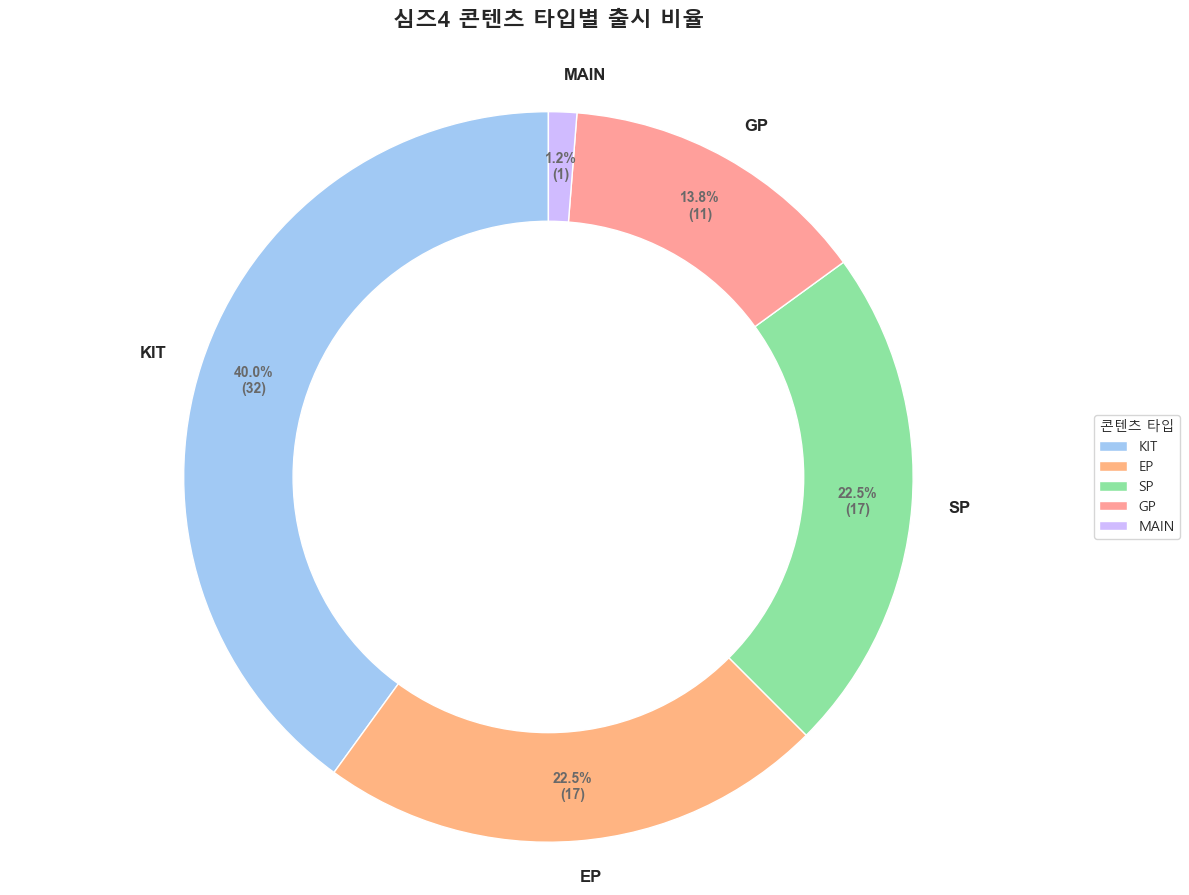

In [7]:
from matplotlib import font_manager, rc
import seaborn as sns
#import koreanize_matplotlib

# 한글 폰트 설정
# font_path = "C:/Windows/Fonts/H2PORL.TTF"  # 윈도우 기준
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

# 데이터 준비
release_counts = release_df['type'].value_counts()

# 색상 팔레트 설정
colors = sns.color_palette("pastel")

# 그림 크기 및 스타일 설정
plt.figure(figsize=(12, 9))
sns.set_style("whitegrid")

# 파이 차트 그리기
wedges, texts, autotexts = plt.pie(release_counts.values, 
                                   labels=release_counts.index, 
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(release_counts.values))})',
                                   pctdistance=0.85,
                                   colors=colors,
                                   startangle=90,
                                   wedgeprops=dict(width=0.5, edgecolor='white'))

# 가운데 원 추가
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 폰트 스타일 설정
plt.setp(autotexts, size=10, weight="bold", color="dimgrey")
plt.setp(texts, size=12, weight="bold")

# 제목 설정
plt.title('심즈4 콘텐츠 타입별 출시 비율', fontsize=16, fontweight='bold', y=1.05, fontdict={"fontname": font_name})

# 범례 추가
plt.rcParams["font.family"] = font_name
plt.legend(wedges, release_counts.index,
           title="콘텐츠 타입",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()